In [1]:
import pandas as pd
from fuzzywuzzy import process, fuzz
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
matched = pd.read_csv('matched_corpus.tsv' ,sep="\t")

In [3]:
latotale = pd.read_csv('latotale.tsv' ,sep="\t")

In [4]:
onglet1 = pd.read_csv('onglet1.tsv' ,sep="\t")

In [5]:
matched

,unittitle,word,ratio
0,"Bapaume, Peufier dit","Pommery, Gabriel dit La Champignère",86
1,"Durand,Jean","Durand, Jean",96
2,"Duranteau,la nommée","Duranteau, la nommée",97
3,"Durivaud (Alias Du Rivau,Du Rivaux",Durivaud,90
4,"Duroulet,Delle","Duroulet, Demoiselle",82
...,...,...,...
1644,Latremblade,La Tremblade,96
1645,"Lupin,fort","Lupin, fort",95
1646,Madame île,"Madame, île",95
1647,"Martinique,île de la","Martinique, île de la",97


<AxesSubplot:xlabel='ratio', ylabel='Count'>

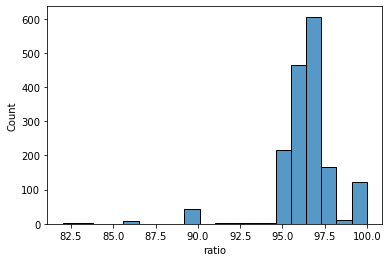

In [6]:
sns.histplot(matched['ratio'], bins=20)

In [7]:
matched.describe()

,ratio
count,1649.000000
mean,96.503942
std,1.920164
min,82.000000
25%,96.000000
50%,97.000000
75%,97.000000
max,100.000000


In [8]:
match_test=matched.query("ratio >= 91")
unwanted_match_test = matched.query("ratio <= 90")

In [9]:
match_test

,unittitle,word,ratio
1,"Durand,Jean","Durand, Jean",96
2,"Duranteau,la nommée","Duranteau, la nommée",97
5,"Dusablé,veuve et sa mère","Dusablé, veuve et sa mère",98
8,"Duverdet,la nommée","Duverdet, la nommée",97
11,"Farcot,Elisabeth","Farcot, Elisabeth",97
...,...,...,...
1644,Latremblade,La Tremblade,96
1645,"Lupin,fort","Lupin, fort",95
1646,Madame île,"Madame, île",95
1647,"Martinique,île de la","Martinique, île de la",97


In [10]:
unwanted_match_test

,unittitle,word,ratio
0,"Bapaume, Peufier dit","Pommery, Gabriel dit La Champignère",86
3,"Durivaud (Alias Du Rivau,Du Rivaux",Durivaud,90
4,"Duroulet,Delle","Duroulet, Demoiselle",82
6,Dussault (alias Dusault),Dusault,90
7,Duthora,Duthoya,86
9,Esmon (alias Edmond),Esmon,90
10,Etienne de Chamflorie,Etienne de Champflour,90
13,Fenelon,E,90
14,Ferrié (alias Le Ferrier),Ferrier,90
17,"Fontaine,François dit Saint Orange",François,90


In [11]:
unwanted_match_test = pd.read_csv('edited_uncleaned_terms.tsv', sep="\t")

In [12]:
unwanted_match_test

,unittitle,word,changed
0,"Bapaume, Peufier dit","Pommery, Gabriel dit La Champignère",N
1,"Durivaud (Alias Du Rivau,Du Rivaux",Durivaud,Y
2,"Duroulet,Delle","Duroulet, Demoiselle",Y
3,Dussault (alias Dusault),Dusault,Y
4,Duthora,Duthoya,Y
5,Esmon (alias Edmond),Esmon,Y
6,Etienne de Chamflorie,Etienne de Champflour,Y
7,Fenelon,E,N
8,Ferrié (alias Le Ferrier),Ferrier,N
9,"Fontaine,François dit Saint Orange",François,N


In [13]:
latotale.sort_index(inplace=True)
match_test.sort_index(inplace=True)


values = set(match_test['unittitle'])

latotale['is_in_matched2'] = latotale['unittitle'].isin(values)

In [14]:
latotale

,unittitle,function,is_in_matched2
0,"Adrien, Veuve Timothée",Personne,False
1,"Aigron, Demoiselle",Personne,False
2,"Albert, Jean",Personne,False
3,"Aldin, Jean (alias Alding)",Personne,False
4,"Alizeau, François",Personne,False
...,...,...,...
10873,Compagnie de la mer du Sud,Affaire,False
10874,Croix de vie,Affaire,False
10875,Invalides,Affaire,False
10876,"Oléron, ile d’",Affaire,False


In [15]:
latotale[latotale['is_in_matched2'] == True]

,unittitle,function,is_in_matched2
4598,"Durand,Jean",Personne,True
4601,"Duranteau,la nommée",Personne,True
4610,"Dusablé,veuve et sa mère",Personne,True
4614,"Duverdet,la nommée",Personne,True
4625,"Farcot,Elisabeth",Personne,True
...,...,...,...
10847,Latremblade,Affaire,True
10848,"Lupin,fort",Affaire,True
10849,Madame île,Affaire,True
10851,"Martinique,île de la",Affaire,True


In [16]:
latotale['is_in_matched2'].value_counts()

False    9284
True     1594
Name: is_in_matched2, dtype: int64

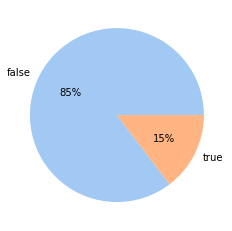

In [17]:
data = latotale['is_in_matched2'].value_counts()
colors = sns.color_palette('pastel')[0:5]

label = ['false' , 'true']

#create pie chart
plt.pie(data, labels = label, colors = colors, autopct='%.0f%%')
plt.show()

In [18]:
testdf = pd.merge(latotale, match_test, on='unittitle', how='left')
testdf = pd.merge(testdf, unwanted_match_test, on='unittitle', how='outer') 

In [19]:
testdf

,unittitle,function,is_in_matched2,word_x,ratio,word_y,changed
0,"Adrien, Veuve Timothée",Personne,False,NaN,NaN,NaN,NaN
1,"Aigron, Demoiselle",Personne,False,NaN,NaN,NaN,NaN
2,"Albert, Jean",Personne,False,NaN,NaN,NaN,NaN
3,"Aldin, Jean (alias Alding)",Personne,False,NaN,NaN,NaN,NaN
4,"Alizeau, François",Personne,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
10873,Compagnie de la mer du Sud,Affaire,False,NaN,NaN,NaN,NaN
10874,Croix de vie,Affaire,False,NaN,NaN,NaN,NaN
10875,Invalides,Affaire,False,NaN,NaN,NaN,NaN
10876,"Oléron, ile d’",Affaire,False,NaN,NaN,NaN,NaN


In [20]:
testdf['unittitle'] = testdf.apply(lambda x: x['word_x'] if x['is_in_matched2']==True else x['unittitle'], axis=1)

In [21]:
testdf['unittitle'] = testdf.apply(lambda x: x['word_y'] if x['changed']=='Y' else x['unittitle'], axis=1)

In [22]:
testdf['is_in_matched2'].value_counts()

False    9284
True     1594
Name: is_in_matched2, dtype: int64

In [23]:
testdf['is_in_matched2'] = testdf['unittitle'].isin(values)

In [24]:
testdf['is_in_matched2'].value_counts()

False    10878
Name: is_in_matched2, dtype: int64

In [25]:
del testdf['is_in_matched2']
del testdf['word_x']
del testdf['word_y']
del testdf['ratio']
del testdf['changed']
testdf.to_csv('cleaned_latotale.tsv' ,sep="\t", index=False)